In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
tree = Tree(fc.passthrough.NN_NMSSM_MX_700_MY_400)

Filter events to have at least 6 jets after preselection filter. Then reorder the jets in pt order. Extract signal b and ISR/FSR jets from tree

In [4]:
tree.extend( reorder_collection(get_collection(tree,'jet'),ak.argsort(-tree.jet_pt,axis=-1)) )
tree = CollectionFilter('jet','sixb',signalId_neq=-1).filter(tree)
tree = CollectionFilter('jet','bkgb',signalId=-1).filter(tree)

In [5]:
sixb = get_collection(tree,'sixb',named=False)
bkgb = get_collection(tree,'bkgb',named=False)
nsixb,nbkgb = [ak.count(jet.pt,axis=-1) for jet in (sixb,bkgb)]

In [6]:
nsixb_fraction = safe_divide(nsixb,tree.n_jet)

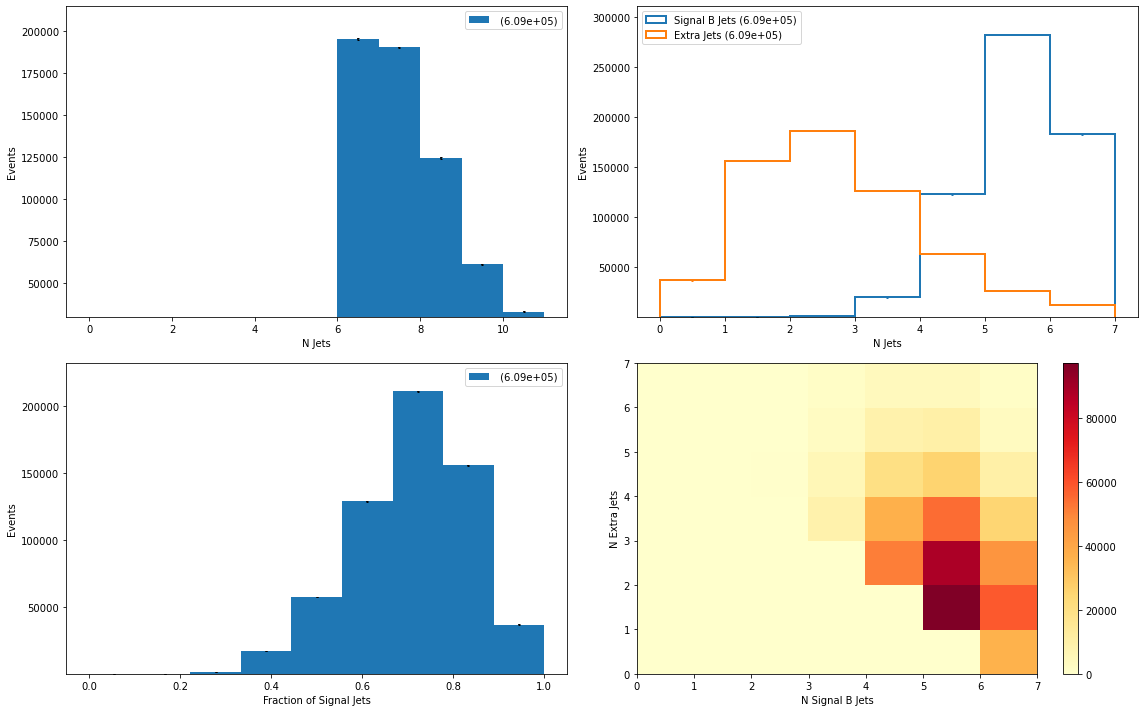

In [12]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(16,10))

hist_multi([tree.n_jet],bins=range(12),xlabel='N Jets',figax=(fig,axs[0,0]))
hist_multi([nsixb,nbkgb],bins=range(8),labels=['Signal B Jets','Extra Jets'],xlabel='N Jets',figax=(fig,axs[0,1]))
hist_multi([nsixb_fraction],bins=np.linspace(0,1,10),xlabel="Fraction of Signal Jets",figax=(fig,axs[1,0]))
hist2d_simple(nsixb,nbkgb,xbins=range(8),ybins=range(8),log=False,xlabel='N Signal B Jets',ylabel='N Extra Jets',figax=(fig,axs[1,1]))

fig.tight_layout()

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

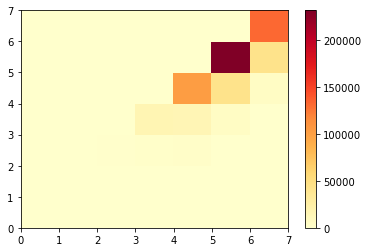

In [14]:
hist2d_simple(tree.nfound_presel,tree.nfound_nn,xbins=range(8),ybins=range(8),log=False)